# The impact of cultural and genetic structure on food choices along the Silk Road

In [ ]:
import pandas
import numpy

from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patches as mpatches

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


---

In [ ]:
tab = pandas.read_csv(food_pref, sep="\t", index_col=0)
tab.head()

,STATUS,NACL,PROP,LIVER,DARK_CHOCOLATE,MILK_CHOCOLATE,CAFFE,ORANGE_JUICE,LEMONS,PANE_DOLCE,...,X.1,X.2,X.3,X.4,FID,IID,sex,age,paese,village
id,,,,,,,,,,,,,,,,,,,,,
590597,NT,13.0,13.0,3.0,5.0,2.0,2.0,5.0,4.0,4.0,...,NaN,NaN,NaN,NaN,245,590597,0,13.0,UZBEKISTAN,Karshi
591285,NT,13.0,2.0,3.0,3.0,5.0,4.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,342,591285,0,12.0,UZBEKISTAN,Bukhara
591286,NT,13.0,7.0,2.0,1.0,5.0,5.0,4.0,3.0,5.0,...,NaN,NaN,NaN,NaN,251,591286,0,47.0,UZBEKISTAN,Bukhara
591287,MT,13.0,36.0,5.0,4.0,4.0,5.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,272,591287,0,43.0,UZBEKISTAN,Bukhara
591288,NT,53.0,13.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,259,591288,0,19.0,UZBEKISTAN,Bukhara


In [ ]:
tab['paese'] = tab['paese'].replace('KAZAKISTAN', 'KAZAKHSTAN')

# Data pre-processing

In [ ]:
# set the food columns
food = ['LIVER','DARK_CHOCOLATE',
       'MILK_CHOCOLATE', 'CAFFE', 'ORANGE_JUICE', 'LEMONS', 'PANE_DOLCE',
       'RED_WINE', 'WHITE_WINE', 'BIRRA', 'VODKA', 'PORK_CHOPS', 'HAM',
       'WILD_MUSHROOMS', 'ASPARAGUS', 'SPINACH', 'CABBAGE', 'GARLIC', 'ONION',
       'KILKA', 'OLIVE', 'ARTICHOKES', 'ICE_CREAM', 'SALAME_COTTO', 'HOT_TEA',
       'SARDINES', 'CHILLI_PEPPER', 'TORTA', 'LAMB', 'BRANDY', 'PISELLI',
       'FAGIOLI', 'FAVE', 'TOMATOES', 'RAPA', 'NOCI', 'MELOGRANO', 'CETRIOLI',
       'WHOLE_MILK', 'YOGURT', 'SHEEP_CHEESE', 'FORM_FUSO', 'FIOCCHI_LATTE',
       'KURUT', 'FORM_AFFUMICATO', 'SULGUNI', 'RICOTTA_DOLCE',
       'RICOTTA_SALATA', 'GRANO_SARACENO', 'BISCOTTI_SECCHI', 'BISCOTTI_CREME',
       'EGGPLANT', 'CAROTE_COTTE', 'CAROTE_CRUDE', 'ACETO', 'MONTONE',
       'MANDORLE', 'AMARENE', 'SUSINE', 'MELE', 'MIELE', 'MARMELLATA', 'GELSO',
       'FRUTTA_SECCA', 'FRAGOLE', 'PRUGNE', 'PEPERONI', 'ADGIKA', 'ANETO',
       'ORZO', 'BURRO', 'ANGURIA', 'MIRTILLI', 'MIRTILLO_NERO', 'BANANA',
       'RISO', 'BARBABIETOLA', 'WHIPPED_CREAM', 'MELONE']
init_food_db = tab[food]
init_food_db.head()

,LIVER,DARK_CHOCOLATE,MILK_CHOCOLATE,CAFFE,ORANGE_JUICE,LEMONS,PANE_DOLCE,RED_WINE,WHITE_WINE,BIRRA,...,ORZO,BURRO,ANGURIA,MIRTILLI,MIRTILLO_NERO,BANANA,RISO,BARBABIETOLA,WHIPPED_CREAM,MELONE
id,,,,,,,,,,,,,,,,,,,,,
590597,3.0,5.0,2.0,2.0,5.0,4.0,4.0,NaN,NaN,NaN,...,3.0,4.0,5.0,4.0,NaN,5.0,3.0,5.0,NaN,2.0
591285,3.0,3.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,...,NaN,5.0,5.0,NaN,NaN,5.0,5.0,2.0,2.0,5.0
591286,2.0,1.0,5.0,5.0,4.0,3.0,5.0,2.0,1.0,3.0,...,NaN,5.0,5.0,2.0,2.0,5.0,5.0,2.0,3.0,5.0
591287,5.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,4.0,4.0,...,4.0,4.0,5.0,2.0,3.0,5.0,5.0,5.0,3.0,4.0
591288,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,...,3.0,5.0,5.0,NaN,1.0,5.0,5.0,4.0,5.0,5.0


### translate names

In [ ]:
names = pandas.read_excel('food_terms_translation.xlsx')
names_dict = names.set_index('MIXED')['ENG'].to_dict()

In [ ]:
init_food_db.columns = init_food_db.columns.map(names_dict)

In [ ]:
tab.columns = tab.columns.map(lambda x: names_dict[x] if x in names_dict else x)

In [ ]:
food = [names_dict[x] if x in names_dict else x for x in food]

In [ ]:
tab['paese'].value_counts()

GEORGIA       122
ARMENIA       104
UZBEKISTAN    102
TAJIKISTAN     98
AZERBAIJAN     65
KAZAKHSTAN     52
Name: paese, dtype: int64

In [ ]:
tab['sex'].value_counts()

0    310
1    233
Name: sex, dtype: int64

In [ ]:
min(tab['age'])

9.0

In [ ]:
max(tab['age'])

82.0

In [ ]:
tab[['village', 'paese']].apply(tuple, axis=1).value_counts()

(Imereti, GEORGIA)              62
(Kakheti, GEORGIA)              44
(Bukhara, UZBEKISTAN)           43
(Karshi, UZBEKISTAN)            36
(Sis, AZERBAIJAN)               36
(Chambarak, ARMENIA)            33
(Khorog, TAJIKISTAN)            30
(Alga, KAZAKHSTAN)              28
(Ismailly, AZERBAIJAN)          26
(Almaty, KAZAKHSTAN)            24
(Shing, TAJIKISTAN)             21
(Tashkent, UZBEKISTAN)          21
(Yegvard, ARMENIA)              20
(Kalaikhum, TAJIKISTAN)         19
(Rushan, TAJIKISTAN)            19
(Martumi, ARMENIA)              16
(Mtskheta_Mtianeti, GEORGIA)    16
(Gavar, ARMENIA)                15
(Deprabak, ARMENIA)             10
(Yerevan, ARMENIA)               9
(Zeravshan, TAJIKISTAN)          9
(nan, AZERBAIJAN)                2
(nan, UZBEKISTAN)                2
(Torino, ARMENIA)                1
(Torino, AZERBAIJAN)             1
dtype: int64

The column "TORTA" contains two strange values: 55 (594278) and 51 (594715).
We recode these values as missing.

In [ ]:
food_db = init_food_db.copy()

food_db.at[594278, 'CAKE'] = None
food_db.at[594715, 'CAKE'] = None 

### High missing samples

Two samples contain only missing values (food features), thus we remove them.

In [ ]:
missing_samples = food_db.loc[food_db.mean(axis=1).sort_values().isnull()].index
food_db2 = food_db.drop(missing_samples, axis=0)

### Evaluation of std

We remove three samples with sd = 0.

In [ ]:
sd0 = food_db2.loc[food_db2.std(axis=1).sort_values() == 0].index
food_db2_nosd0 = food_db2.drop(sd0, axis=0)

In [ ]:
#food_db2_nosd0.to_csv('dataset/food_db2_nosd0.tsv', sep="\t")

Is there a different missing count among different countries?

In [ ]:
miss_samples_db = pandas.DataFrame(food_db2_nosd0.count(axis=1).sort_values())
miss_samples_db['miss_ratio'] = 1-(miss_samples_db[0]/len(food_db.columns))
miss_samples_db['paese'] = tab['paese']
miss_samples_db.loc[miss_samples_db['miss_ratio'] >= 0.20]['paese'].value_counts()

miss_samples_db['missing'] = 79-miss_samples_db[0]
miss_chi = pandas.DataFrame(miss_samples_db.groupby('paese')[0].sum())
miss_chi[1] = miss_samples_db.groupby('paese')['missing'].sum()
miss_chi.head()

,0,1
paese,,
ARMENIA,7767,449
AZERBAIJAN,4404,652
GEORGIA,9064,416
KAZAKHSTAN,3752,356
TAJIKISTAN,6459,1125


In [ ]:
chi2_contingency(miss_chi)

(869.2066747959359,
 1.2279203784074195e-185,
 5,
 array([[7437.1598513 ,  778.8401487 ],
        [4576.71375465,  479.28624535],
        [8581.33828996,  898.66171004],
        [3718.57992565,  389.42007435],
        [6865.07063197,  718.92936803],
        [7294.13754647,  763.86245353]]))

### High missing food

In [ ]:
# number of missing values 

food_db2_nosd0.shape[0] - food_db2_nosd0.count().sort_values()[0:30]
#538 individuals

ARTICHOKES        337
ASPARAGUS         249
BRANDY            229
PORK_CHOPS        192
VODKA             179
HAM               164
SULGUNI           163
KURUT             155
WHITE_WINE        155
BLACKBERRY        143
BEER              139
RED_WINE          134
COOKED_SALAMI     128
BARLEY            120
VINEGAR           113
BLUEBERRY         112
SALTY_RICOTTA      98
OLIVES             87
SWEET_RICOTTA      87
MELTED_CHEESE      69
SMOKED_CHEESE      61
SHEEP_CHEESE       55
SPINACH            53
COTTAGE_CHEESE     53
ADGIKA             50
SARDINES           44
KILKA              44
CHILLI_PEPPER      42
WILD_MUSHROOMS     35
FAVA_BEANS         32
dtype: int64

In [ ]:
# food_db2_nosd0.shape[0] is 538 (individuals)
high_missing_food = food_db2_nosd0.count()[(food_db2_nosd0.shape[0] - food_db2_nosd0.count().sort_values()) > 100].index
high_missing_food

Index(['RED_WINE', 'WHITE_WINE', 'BEER', 'VODKA', 'PORK_CHOPS', 'HAM',
       'ASPARAGUS', 'ARTICHOKES', 'COOKED_SALAMI', 'BRANDY', 'KURUT',
       'SULGUNI', 'VINEGAR', 'BARLEY', 'BLUEBERRY', 'BLACKBERRY'],
      dtype='object')

### Chi-square test for each food across the countries

Given that there is a different missing count among countries, are there also specific food differently missing among the countries?

In [ ]:
food_miss_chisq = {}
food_db2_nosd0_with_country = food_db2_nosd0.copy()
food_db2_nosd0_with_country['paese'] = tab['paese']
for food in food_db2_nosd0.columns:
    if food == 'TOMATOES': continue
    non_missing = food_db2_nosd0_with_country.groupby('paese')[food].count()
    tot = food_db2_nosd0_with_country['paese'].value_counts()
    missing = tot - non_missing
 
    df = pandas.concat([non_missing, missing], axis=1)
    food_miss_chisq[food] = chi2_contingency(df)[1]*79
 
food_miss_chisq_db_with_art = pandas.Series(food_miss_chisq)
food_miss_chisq_db = pandas.Series(food_miss_chisq)
food_miss_chisq_db_with_art

LIVER             3.335400e-03
DARK_CHOCOLATE    1.660185e+01
MILK_CHOCOLATE    3.226056e+01
COFFEE            3.926349e-02
ORANGE_JUICE      1.837476e-01
                      ...     
BANANA            3.797829e-09
RICE              8.644600e-01
BEET              1.282928e+01
WHIPPED_CREAM     5.053172e+00
MELON             5.969626e+00
Length: 78, dtype: float64

In [ ]:
food_miss_chisq = {}
food_db2_nosd0_with_country = food_db2_nosd0.drop('ARTICHOKES', axis=1).copy()
food_db2_nosd0_with_country['paese'] = tab['paese']
for food in food_db2_nosd0.drop('ARTICHOKES', axis=1).columns:
    if food == 'TOMATOES': continue
    non_missing = food_db2_nosd0_with_country.groupby('paese')[food].count()
    tot = food_db2_nosd0_with_country['paese'].value_counts()
    missing = tot - non_missing
 
    df = pandas.concat([non_missing, missing], axis=1)
    food_miss_chisq[food] = chi2_contingency(df)[1]*78
 
food_miss_chisq_db_no_art = pandas.Series(food_miss_chisq)
food_miss_chisq_db_no_art

LIVER             3.293180e-03
DARK_CHOCOLATE    1.639170e+01
MILK_CHOCOLATE    3.185220e+01
COFFEE            3.876648e-02
ORANGE_JUICE      1.814217e-01
                      ...     
BANANA            3.749755e-09
RICE              8.535174e-01
BEET              1.266688e+01
WHIPPED_CREAM     4.989208e+00
MELON             5.894061e+00
Length: 77, dtype: float64

In [ ]:
food_miss_chisq_db_no_art[food_miss_chisq_db_no_art < 0.05].sort_values()
# supplementary table 3 with p-values

PORK_CHOPS        2.785512e-43
SULGUNI           3.357674e-40
KURUT             1.069225e-35
HAM               2.974146e-35
BRANDY            6.499540e-32
RED_WINE          1.697917e-27
COOKED_SALAMI     2.087025e-27
WHITE_WINE        4.387721e-27
VODKA             8.669290e-26
BEER              2.198627e-23
ASPARAGUS         9.215661e-15
VINEGAR           9.417836e-11
OLIVES            9.579215e-11
BLACKBERRY        2.242224e-10
BANANA            3.749755e-09
ADGIKA            4.312905e-08
JAM               4.116620e-07
SALTY_RICOTTA     5.655774e-07
SWEET_RICOTTA     3.005164e-06
MULBERRY          5.300952e-06
SPINACH           1.152051e-05
BARLEY            1.294361e-05
COTTAGE_CHEESE    1.767772e-04
STRAWBERRIES      3.438298e-04
CHILLI_PEPPER     1.707540e-03
LIVER             3.293180e-03
WILD_MUSHROOMS    4.349573e-03
EGGPLANT          7.056997e-03
SMOKED_CHEESE     1.249671e-02
KILKA             2.000106e-02
COFFEE            3.876648e-02
dtype: float64

In [ ]:
sign_food=pandas.Series(food_miss_chisq)[pandas.Series(food_miss_chisq) < 0.05].index
sign_food_na_count = food_db2_nosd0.isnull().groupby(tab['paese'])[sign_food].mean()
sign_food_na_count_lf = sign_food_na_count.stack().reset_index()
len(sign_food)

31

In [ ]:
(food_db2_nosd0.shape[0] - food_db2_nosd0.drop(sign_food, axis=1).count().sort_values()) > food_db2_nosd0.shape[0] * 0.5

ARTICHOKES         True
BLUEBERRY         False
MELTED_CHEESE     False
SHEEP_CHEESE      False
SARDINES          False
FAVA_BEANS        False
BUCKWHEAT         False
BEANS             False
COOKED_CARROTS    False
TURNIP            False
YOGURT            False
DARK_CHOCOLATE    False
PEAS              False
WHIPPED_CREAM     False
DILL              False
ALMONDS           False
WHOLE_MILK        False
LAMB              False
DRIED_FRUIT       False
ICE_CREAM         False
DRY_BISCUITS      False
MUTTON            False
CREAM_BISCUITS    False
PEPPERS           False
SWEET_BREAD       False
BEET              False
GARLIC            False
CAKE              False
LEMONS            False
MILK_CHOCOLATE    False
HONEY             False
ORANGE_JUICE      False
ONION             False
RAW_CARROTS       False
PRUNE             False
MELON             False
HOT_TEA           False
APPLES            False
CABBAGE           False
CUCUMBER          False
WALNUTS           False
BUTTER          

In [ ]:
pandas.DataFrame(sign_food).to_csv('drive/My Drive/assegno_padova/clustering/new_analyses_2022/sign_food.tsv', index=False, header=False)

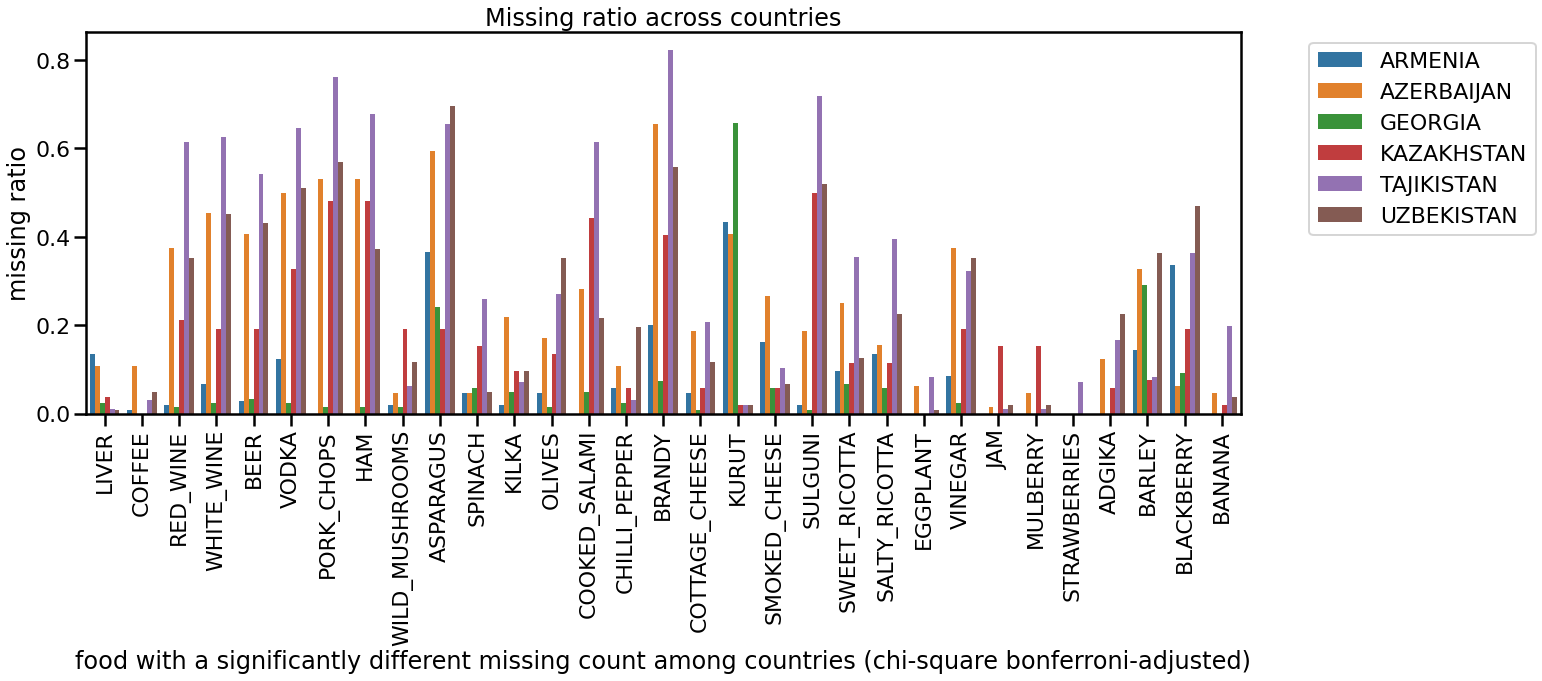

In [ ]:
plt.figure(figsize=(22,10))
sns.set_context("poster")
sns.barplot(x="level_1", y=0, hue="paese", data=sign_food_na_count_lf)
#sns.catplot(x="level_1", y=0, hue="paese", data=sign_food_na_count_lf, jitter=False)
plt.xticks(rotation=90)
plt.title('Missing ratio across countries')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.ylabel('missing ratio')
plt.xlabel('food with a significantly different missing count among countries (chi-square bonferroni-adjusted)')
#plt.savefig('drive/My Drive/assegno_padova/clustering/new_analyses_2022/missing_ratio.pdf')
plt.show()
plt.close()

### Correlation of missing hits among different food

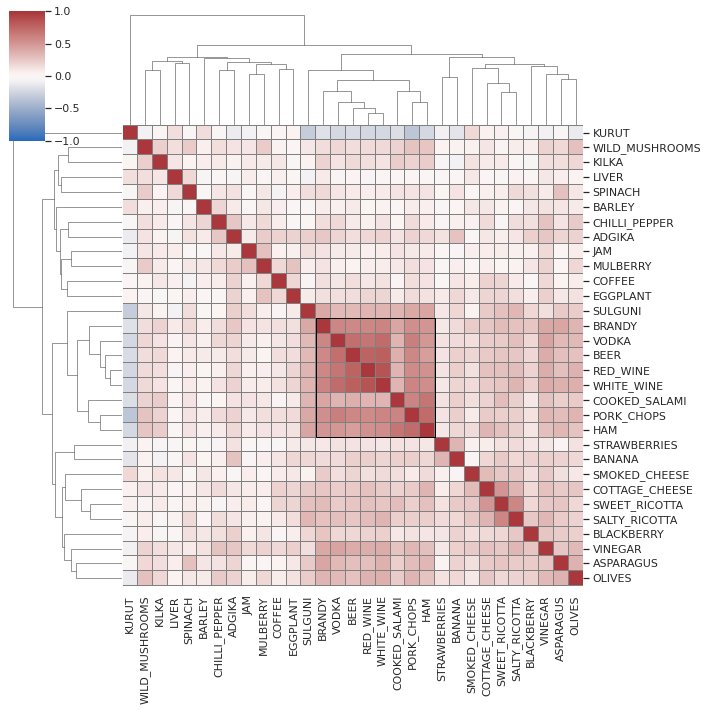

In [ ]:
from matplotlib.patches import Rectangle
sns.set(font_scale=1)
g = sns.clustermap(food_db2_nosd0[sign_food].isnull().corr(), center=0, vmin=-1, vmax=1, cmap="vlag", linewidths=0.005, linecolor='grey')
#plt.savefig('missing_correlation.pdf')

ax = g.ax_heatmap

ax.add_patch(Rectangle((13, 13), 8, 8, fill=False, edgecolor='black', lw=1))
plt.show()
#plt.savefig('drive/My Drive/assegno_padova/clustering/new_analyses_2022/missing_correlation_paper.pdf')
plt.close()

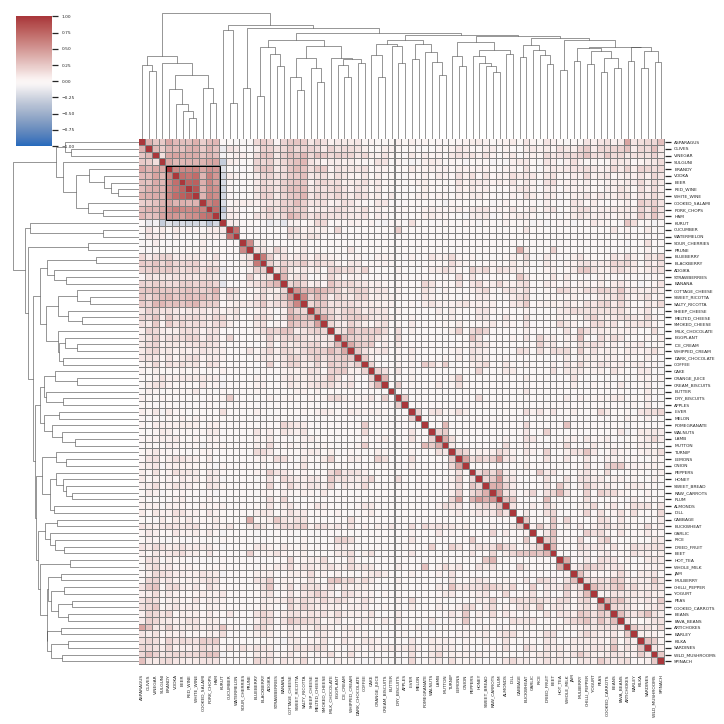

In [ ]:
# we remove in this plot "tomatoes" since it has no missing
sns.set(font_scale=0.4)
g = sns.clustermap(food_db2_nosd0.drop('TOMATOES', axis=1).isnull().corr(), center=0, vmin=-1, vmax=1, cmap="vlag", linewidths=0.005, linecolor='grey')

ax = g.ax_heatmap

ax.add_patch(Rectangle((4, 4), 8, 8, fill=False, edgecolor='black', lw=1))

#plt.savefig('drive/My Drive/assegno_padova/clustering/new_analyses_2022/missing_correlation_all_food_paper.pdf')
plt.show()
plt.close()

# Missing data, normalization and scaling

#### removal of 61 individuals with to many never tasted (missing) answers in not significant foods; removal of artichokes, fillna(1) and scaling

In [ ]:
to_remove = food_db2_nosd0.drop(sign_food, axis=1).isnull().mean(axis=1)[(food_db2_nosd0.drop(sign_food, axis=1).isnull().mean(axis=1) > 0.10)].index
food_db2_nosd0_nomiss = food_db2_nosd0.drop(to_remove, axis=0)

In [ ]:
food_db_miss_first = food_db2_nosd0_nomiss.fillna(1).drop('ARTICHOKES', axis=1)

In [ ]:
transformer = StandardScaler().fit_transform(food_db_miss_first.T).T
food_db_miss_first_norm = (pandas.DataFrame(transformer, columns = food_db_miss_first.columns, index = food_db_miss_first.index))

In [ ]:
#food_db_miss_first_norm.to_csv('dataset/1_all_food_missing_1.tsv', sep="\t")

### matrix for SpaceMix

tertile transformation (0, 1 e 2) and then median per village

In [ ]:
#pandas.qcut(food_db_miss_first_norm['LIVER'], q=3, labels=False)
food_db_miss_first_norm_qcut = food_db_miss_first_norm.apply(lambda x: pandas.qcut(x, 3, labels=False), axis=0)
food_db_miss_first_norm_qcut['VILLAGE'] = tab['village']

In [ ]:
qcut_median = food_db_miss_first_norm_qcut.groupby(['VILLAGE']).median()
qcut_median.to_csv('drive/My Drive/assegno_padova/clustering/new_analyses_2022/dataset/food_db_miss_first_norm_qcut_median.tsv', sep="\t")

In [ ]:
dist_food_db_miss_first_norm_corr = 1-numpy.square(food_db_miss_first_norm.T.corr())
dist_food_db_miss_first_norm_corr.to_csv('drive/My Drive/assegno_padova/clustering/new_analyses_2022/dataset/dist_mat_all_food_missing_1_norm.tsv', sep="\t")